In [41]:
import numpy as np

from multiprocessing import Pool
import multiprocessing


#### 1.  –°–æ–∑–¥–∞–π—Ç–µ –º–∞—Ç—Ä–∏—Ü—É 3x3 —Å–æ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –æ—Ç 0 –¥–æ 8

In [5]:
a = np.arange(0,9)
a.reshape(3,3)

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

#### 2. –ù–µ–æ–±—Ö–æ–¥–∏–º–æ –Ω–∞–π—Ç–∏ –≤—Å–µ —Ü–µ–ª—ã–µ —á–∏—Å–ª–∞ –æ—Ç 1 –¥–æ 400 000, –¥–ª—è –∫–æ—Ç–æ—Ä—ã—Ö sin –æ—Ç —ç—Ç–æ–≥–æ —á–∏—Å–ª–∞ –±—É–¥–µ—Ç –∏–º–µ—Ç—å –Ω–µ –º–µ–Ω–µ–µ 9 –æ–¥–∏–Ω–∞–∫–æ–≤—ã—Ö —Ü–∏—Ñ—Ä (–Ω–∞–ø—Ä–∏–º–µ—Ä, sin(139198)=0.30763333543133703; sin(139198)=0.30763333543133703 —Ç.–µ. –∏–º–µ–µ—Ç 9 —Ç—Ä–æ–µ–∫). –û—Ç–≤–µ—Ç –ø—Ä–µ–¥—Å—Ç–∞–≤–ª—è–µ—Ç —Å–æ–±–æ–π —Å–ø–∏—Å–æ–∫ –ø–∞—Ä (—Ü–µ–ª–æ–µ —á–∏—Å–ª–æ, –∑–Ω–∞—á–µ–Ω–∏–µ —Å–∏–Ω—É—Å–∞ –¥–ª—è –Ω–µ–≥–æ), –¥–ª—è –∫–æ—Ç–æ—Ä—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–µ —Å–∏–Ω—É—Å–∞ —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä—è–µ—Ç —É—Å–ª–æ–≤–∏—é. –†–µ—à–µ–Ω–∏–µ —ç—Ç–æ–π –∑–∞–¥–∞—á–∏ —Ä–∞—Å–ø–∞—Ä–∞–ª–ª–µ–ª–∏—Ç—å, –∏—Å–ø–æ–ª—å–∑—É—è multiprocessing Pool. –°—Ä–∞–≤–Ω–∏—Ç—å –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ–≥–æ –∏ –ø–∞—Ä–∞–ª–ª–µ–ª—å–Ω–æ–≥–æ —Ä–µ—à–µ–Ω–∏—è –∑–∞–¥–∞—á–∏.


In [56]:
%%writefile count_sin.py
from collections import Counter
import math


def count_sin(x):
    myDict = Counter(str(math.sin(x)))
    if max(myDict.values()) >= 9:
        return x , math.sin(x)
    return None

Overwriting count_sin.py


In [62]:
%%time
from multiprocessing import Pool
from count_sin import count_sin

if __name__ == '__main__':
    with Pool() as pool:
        result = pool.map(count_sin, range(1, 400_001))

result = [res for res in result if res != None]
result

CPU times: user 70.4 ms, sys: 110 ms, total: 181 ms
Wall time: 331 ms


[(1797, 0.009002025051800673),
 (3775, -0.9299841096999939),
 (7089, 0.9999926930119999),
 (10639, 0.9999937999413936),
 (24074, 0.024502006300003643),
 (25904, -0.9999975242999319),
 (31249, 0.4097000800060077),
 (36693, -0.7188828881448883),
 (38968, -0.31007805001001504),
 (46617, 0.8881880887188651),
 (47105, -0.040237060001058055),
 (47306, -0.10200005360030799),
 (48979, 0.9999999646773939),
 (50399, 0.9999999894564097),
 (50754, -0.9999999933794586),
 (51109, 0.9999999963938254),
 (51464, -0.9999999984995102),
 (51819, 0.999999999696513),
 (52174, -0.9999999999848337),
 (52529, 0.9999999993644724),
 (52884, -0.999999997835429),
 (53239, 0.9999999953977037),
 (53594, -0.9999999920512962),
 (54609, 0.9649091969997949),
 (54659, 0.9999999765599817),
 (55724, -0.9999999528905291),
 (58564, -0.9999998497899818),
 (60694, -0.999999734299931),
 (63525, 0.9107300260000201),
 (66374, -0.9999992663984799),
 (67490, 0.7412811211116511),
 (78444, -0.9999974997289492),
 (97284, 0.99170294159

In [70]:
%%time
from collections import Counter
import math

def count_sin(x):
    myDict = Counter(str(math.sin(x)))
    if max(myDict.values()) >= 9:
        return x , math.sin(x)
    return None

result = []
for i in range(1, 400_001):
    res = count_sin(i)
    if res != None:
        result.append(res)
result
    

CPU times: user 1.16 s, sys: 6.27 ms, total: 1.17 s
Wall time: 1.17 s


[(1797, 0.009002025051800673),
 (3775, -0.9299841096999939),
 (7089, 0.9999926930119999),
 (10639, 0.9999937999413936),
 (24074, 0.024502006300003643),
 (25904, -0.9999975242999319),
 (31249, 0.4097000800060077),
 (36693, -0.7188828881448883),
 (38968, -0.31007805001001504),
 (46617, 0.8881880887188651),
 (47105, -0.040237060001058055),
 (47306, -0.10200005360030799),
 (48979, 0.9999999646773939),
 (50399, 0.9999999894564097),
 (50754, -0.9999999933794586),
 (51109, 0.9999999963938254),
 (51464, -0.9999999984995102),
 (51819, 0.999999999696513),
 (52174, -0.9999999999848337),
 (52529, 0.9999999993644724),
 (52884, -0.999999997835429),
 (53239, 0.9999999953977037),
 (53594, -0.9999999920512962),
 (54609, 0.9649091969997949),
 (54659, 0.9999999765599817),
 (55724, -0.9999999528905291),
 (58564, -0.9999998497899818),
 (60694, -0.999999734299931),
 (63525, 0.9107300260000201),
 (66374, -0.9999992663984799),
 (67490, 0.7412811211116511),
 (78444, -0.9999974997289492),
 (97284, 0.99170294159

–î–∞—Ç–∞—Å–µ—Ç: addres-book-q.xml 
 #### 3. –ü–æ –¥–∞–Ω–Ω—ã–º –∏–∑ —Ñ–∞–π–ª–∞ addres-book-q.xml —Å—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞—Ç—å —Å–ª–æ–≤–∞—Ä—å, –≤ –∫–æ—Ç–æ—Ä–æ–º –ø–æ –¥–æ–ª–∂–Ω–æ—Å—Ç–∏ –º–æ–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å —Å–ø–∏—Å–æ–∫ –ª—é–¥–µ–π —Å –¥–∞–Ω–Ω–æ–π –¥–æ–ª–∂–Ω–æ—Å—Ç—å—é –∏ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —á–µ–ª–æ–≤–µ–∫–∞ –ø–æ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–µ–º—É –∫–ª—é—á—É –º–æ–∂–Ω–æ –ø–æ–ª—É—á–∏—Ç—å –∏–º—è, –∫–æ–º–ø–∞–Ω–∏—é –∏ —Å–ø–∏—Å–æ–∫ –≤—Å–µ—Ö –¥–æ—Å—Ç—É–ø–Ω—ã—Ö —Ç–µ–ª–µ—Ñ–æ–Ω–æ–≤. –°–æ—Ö—Ä–∞–Ω–∏—Ç—å –¥–∞–Ω–Ω—É—é —Å—Ç—Ä—É–∫—Ç—É—Ä—É –¥–∞–Ω–Ω—ã—Ö –≤ —Ñ–∞–π–ª —Ñ–æ—Ä–º–∞—Ç–∞ json –∏ –ø—Ä–æ—á–∏—Ç–∞—Ç—å –µ–µ, –ø–æ–∫–∞–∑–∞–≤ –∏–¥–µ–Ω—Ç–∏—á–Ω–æ—Å—Ç—å —Å—Ç—Ä—É–∫—Ç—É—Ä—ã –¥–∞–Ω–Ω—ã—Ö –ø–æ—Å–ª–µ —Å–æ—Ö—Ä–∞–Ω–µ–Ω–∏—è/–∑–∞–≥—Ä—É–∑–∫–∏.


In [156]:
import xml.etree.ElementTree as ET
import json
from bs4 import BeautifulSoup

In [185]:
tree = ET.parse('data/addres-book-q.xml')
root = tree.getroot()

people_by_job = {}
all_by_people = {}

for add in root.findall('country/address'):
    job = add.find('position').text
    people_by_job.setdefault(job, []).append(add.find('name').text)
    
print(people_by_job)

for add in root.findall('country/address'):
    person_id = add.attrib['id']
    phones = add.findall('phones/phone')
    phone_numbers = [phone.text for phone in phones]

    all_by_people.setdefault(person_id, []).append([add.find('name').text, add.find('company').text, phone_numbers])

print(all_by_people)

{'Presidente': ['Aicha Barki'], 'Directeur General': ['Francisco Domingos'], 'Directrice Nationale': ['Maria Luisa'], 'Chef': ['Abraao Chanda'], 'Executive Director': ['Beatriz Busaniche', 'Francesca Beddie'], 'Secretary': ['Graham John Smith']}
{'1': [['Aicha Barki', "Association Algerienne d'Alphabetisation Iqraa", ['+ (213) 6150 4015', '+ (213) 2173 5247']]], '2': [['Francisco Domingos', 'Institut National de Education des Adultes', ['+ (244-2) 325 023', '+ (244-2) 325 023']]], '3': [['Maria Luisa', 'Institut National de Education des Adultes', ['+ (244) 4232 2836']]], '4': [['Abraao Chanda', 'Institut National de Education des Adultes', ['+ (244-2) 325 023', '+ (244-2) 325 023']]], '5': [['Beatriz Busaniche', 'Universidad de Buenos Aires', ['+ (54-11) 4784 1159']]], '6': [['Francesca Beddie', 'Adult Learning Australia', ['+ (61-2) 6274 9500', '+ (61-2) 6274 9513']]], '7': [['Graham John Smith', 'Disability Australia Ltd', ['+ (61-3) 9807 4702']]]}


In [187]:
with open('address_book.json', 'w') as f:
    json.dump(people_by_job, f)

with open('address_book.json', 'r') as f:
    loaded_data = json.load(f)

print(people_by_job == loaded_data)

True


In [142]:
ET.dump(tree)

<address_book>
<country name="algeria">
<address id="1">
	<gender>m</gender>
	<name>Aicha Barki</name>
	<email>aiqraa.asso@caramail.com</email>
	<position>Presidente</position>
	<company>Association Algerienne d'Alphabetisation Iqraa</company>
	<phones>
		<phone type="work">+ (213) 6150 4015</phone>
		<phone type="personal">+ (213) 2173 5247</phone>
	</phones>	
</address>
</country>
<country name="angola">
<address id="2">
	<gender>m</gender>
	<name>Francisco Domingos</name>
	<email>frandomingos@hotmail.com</email>
	<position>Directeur General</position>
	<company>Institut National de Education des Adultes</company>
	<phones>
		<phone type="work">+ (244-2) 325 023</phone>
		<phone type="personal">+ (244-2) 325 023</phone>
	</phones>	
</address>
<address id="3">
	<gender>f</gender>
	<name>Maria Luisa</name>
	<email>luisagrilo@ebonet.net</email>
	<position>Directrice Nationale</position>
	<company>Institut National de Education des Adultes</company>
	<phones>
		<phone type="personal">+ (

–î–∞—Ç–∞—Å–µ—Ç: all_k.zip
#### 4. –ü–æ–¥—Å—á–∏—Ç–∞—Ç—å, —Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –≤ —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö —Ñ–∞–π–ª–∞—Ö, –ª–µ–∂–∞—â–∏—Ö –≤ all_k.zip, –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è —Ç—Ä–µ—Ö –≤–∏–¥–æ–≤: –≤–æ–ø—Ä–æ—Å–∏—Ç–µ–ª—å–Ω—ã–µ (–≤ –æ–∫–æ–Ω—á–∞–Ω–∏–∏ –∏–º–µ—é—Ç –≤–æ–ø—Ä–æ—Å–∏—Ç–µ–ª—å–Ω—ã–π –∑–Ω–∞–∫), –ø–æ–±—É–¥–∏—Ç–µ–ª—å–Ω—ã–µ (–≤ –æ–∫–æ–Ω—á–∞–Ω–∏–∏ –∏–º–µ—é—Ç –≤–æ—Å–∫–ª–∏—Ü–∞—Ç–µ–ª—å–Ω—ã–π –∑–Ω–∞–∫ –∏ –Ω–µ –∏–º–µ—é—Ç –≤–æ–ø—Ä–æ—Å–∏—Ç–µ–ª—å–Ω–æ–≥–æ) –∏ –ø–æ–≤–µ—Å—Ç–≤–æ–≤–∞—Ç–µ–ª—å–Ω—ã–µ (–≤ –æ–∫–æ–Ω—á–∞–Ω–∏–∏ –∏–º–µ—é—Ç —Ç–æ—á–∫—É –∏–ª–∏ —Ç—Ä–æ–µ—Ç–æ—á–∏–µ, –ø—Ä–∏ —ç—Ç–æ–º –Ω—É–∂–Ω–æ –∏—Å–∫–ª—é—á–∏—Ç—å —É—á–µ—Ç —Ç–æ—á–µ–∫, –≤—Å—Ç—Ä–µ—á–∞—é—â–∏—Ö—Å—è –≤ —Å–æ–∫—Ä–∞—â–µ–Ω–∏—è—Ö, —Ç–∞–∫–∏—Ö –∫–∞–∫ ""—Ç.–∫."").
–í—ã–ø–æ–ª–Ω–∏—Ç—å –∑–∞–¥–∞–Ω–∏–µ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º Dask (–∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–º!), —Ä–∞—Å–ø–∞—Ä–∞–ª–ª–µ–ª–∏–≤ –ø—Ä–æ—Ü–µ—Å—Å –æ–±—Ä–∞–±–æ—Ç–∫–∏ –¥–∞–Ω–Ω—ã—Ö (–∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ Dask –¥–æ–ª–∂–Ω–æ –ø—Ä–∏–≤–æ–¥–∏—Ç—å –∫ –∏—Å—Ç–∏–Ω–Ω–æ–π –ø–∞—Ä–∞–ª–ª–µ–ª—å–Ω–æ–π –æ–±—Ä–∞–±–æ—Ç–∫–µ –¥–∞–Ω–Ω—ã—Ö).


In [203]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/kirillanpilov/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [218]:
import dask.bag as db
import os
import re
import nltk


all_k = "data/all_k"

all_k = db.read_text(os.path.join(all_k,"*.TXT"), encoding = 'windows-1251')
all_k = all_k.map(lambda x: x.strip())
all_k = all_k.filter(lambda x: x != '')
sentences = all_k.map(lambda x: nltk.sent_tokenize(x))
sentences = sentences.flatten()


question_count = sentences.map(lambda x: x.endswith('?'))
imperative_count = sentences.map(lambda x: x.endswith('!') and not x.endswith('?!'))
declarative_count =sentences.map(lambda x: x.endswith('.') or x.endswith('...'))  




In [219]:
declarative_count.sum().compute() , imperative_count.sum().compute(), question_count.sum().compute()

(3745892, 239662, 437129)

–î–∞—Ç–∞—Å–µ—Ç: wine.csv.zip
#### 5.
 #### 1. –ö–∞–∫ —á–∞—Å—Ç–æ –∫–∞–∂–¥–∞—è —Å—Ç—Ä–∞–Ω–∞ –ø–æ—è–≤–ª—è–µ—Ç—Å—è –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ wine.csv.zip? –°–æ–∑–¥–∞–π—Ç–µ pd.Series —Å–æ–ø–æ—Å—Ç–∞–≤–ª—è—é—â—É—é —Å—Ç—Ä–∞–Ω—ã –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –æ—Ç–∑—ã–≤–æ–≤ –æ –≤–∏–Ω–∞—Ö –∏–∑ —ç—Ç–æ–π —Å—Ç—Ä–∞–Ω—ã. 
####  2. –û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ —Å—Ä–µ–¥–Ω—é—é –æ—Ü–µ–Ω–∫—É —Ä–µ–π—Ç–∏–Ω–≥–∞ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Ä–µ–≤—å—é–µ—Ä–∞ (–∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ 'taster_name' ,'points')


In [221]:
import pandas as pd

In [226]:
df_wine = pd.read_csv('data/winemag-data-130k-v2.csv')
df_wine = df_wine.drop('Unnamed: 0', axis = 1)
df_wine.head()

country                                        description  \
0     Italy  Aromas include tropical fruit, broom, brimston...   
1  Portugal  This is ripe and fruity, a wine that is smooth...   
2        US  Tart and snappy, the flavors of lime flesh and...   
3        US  Pineapple rind, lemon pith and orange blossom ...   
4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulk√† Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O‚ÄôKeefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulk√† Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine¬†      Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine¬†  Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

In [227]:
df_wine.groupby('country')['title'].count().sort_values()

country
China                         1
Slovakia                      1
Egypt                         1
Armenia                       2
Bosnia and Herzegovina        2
Luxembourg                    6
Switzerland                   7
India                         9
Cyprus                       11
Czech Republic               12
Serbia                       12
Macedonia                    12
Ukraine                      14
Peru                         16
Morocco                      28
Lebanon                      35
Brazil                       52
Moldova                      59
Mexico                       70
Croatia                      73
England                      74
Georgia                      86
Slovenia                     87
Turkey                       90
Uruguay                     109
Romania                     120
Bulgaria                    141
Hungary                     146
Canada                      257
Greece                      466
Israel                      505


In [228]:
df_wine.groupby('taster_name')['points'].mean().sort_values()

taster_name
Alexander Peartree    85.855422
Carrie Dykes          86.395683
Susan Kostrzewa       86.609217
Fiona Adams           86.888889
Michael Schachner     86.907493
Lauren Buzzeo         87.739510
Christina Pickard     87.833333
Jeff Jenssen          88.319756
Anna Lee C. Iijima    88.415629
Joe Czerwinski        88.536235
Jim Gordon            88.626287
Roger Voss            88.708003
Sean P. Sullivan      88.755739
Kerin O‚ÄôKeefe         88.867947
Paul Gregutt          89.082564
Mike DeSimone         89.101167
Virginie Boone        89.213379
Matt Kettmann         90.008686
Anne Krebiehl¬†MW      90.562551
Name: points, dtype: float64

–î–∞—Ç–∞—Å–µ—Ç: minutes_n_ingredients_full.hdf5
 #### 6. –°—á–∏—Ç–∞–π—Ç–µ –¥–∞—Ç–∞—Å–µ—Ç recipe –∏–∑ —Ñ–∞–π–ª–∞ minutes_n_ingredients_full.hdf5 –≤ –≤–∏–¥–µ dask.array. –£–∫–∞–∂–∏—Ç–µ –∞—Ä–≥—É–º–µ–Ω—Ç chunks=(100_000, 3) –ø—Ä–∏ —Å–æ–∑–¥–∞–Ω–∏–∏ –º–∞—Å—Å–∏–≤–∞. –í—ã–≤–µ–¥–∏—Ç–µ –Ω–∞ —ç–∫—Ä–∞–Ω –æ—Å–Ω–æ–≤–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –º–∞—Å—Å–∏–≤–µ –∏ –≤—ã—á–∏—Å–ª–∏—Ç–µ —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –ø–æ –∫–∞–∂–¥–æ–º—É —Å—Ç–æ–ª–±—Ü—É, –∫—Ä–æ–º–µ –ø–µ—Ä–≤–æ–≥–æ.


In [42]:
import h5py
import dask.array as da

filename = 'minutes_n_ingredients_full.hdf5'
with h5py.File(filename, 'r') as f:
     dataset = f['recipe']
     dask_array = da.from_array(dataset[:], chunks=(100_000, 3))

dask_array[:,1:].mean(axis = 0).compute()
    


array([1004.20805176,    5.4198008 ])

–î–∞—Ç–∞—Å–µ—Ç: titanic.csv
 #### 7. 
 ##### 1. –°–∫–æ–ª—å–∫–æ –º—É–∂—á–∏–Ω / –∂–µ–Ω—â–∏–Ω –Ω–∞—Ö–æ–¥–∏–ª–æ—Å—å –Ω–∞ –±–æ—Ä—Ç—É? 
 ##### 2. –ü—Ä–∞–≤–¥–∞ –ª–∏, —á—Ç–æ –∂–µ–Ω—â–∏–Ω—ã –≤—ã–∂–∏–≤–∞–ª–∏ —á–∞—â–µ –º—É–∂—á–∏–Ω? –ö–∞–∫–æ–≤—ã –¥–æ–ª–∏ –≤—ã–∂–∏–≤—à–∏—Ö –≤ –æ–±–µ–∏—Ö –≥—Ä—É–ø–ø–∞—Ö?


In [45]:
import pandas as pd 
df_titanic = pd.read_csv('data/titanic.csv')
df_titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [47]:
df_titanic['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [49]:
df_titanic.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [51]:
df_titanic.groupby('Sex')['Survived'].sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

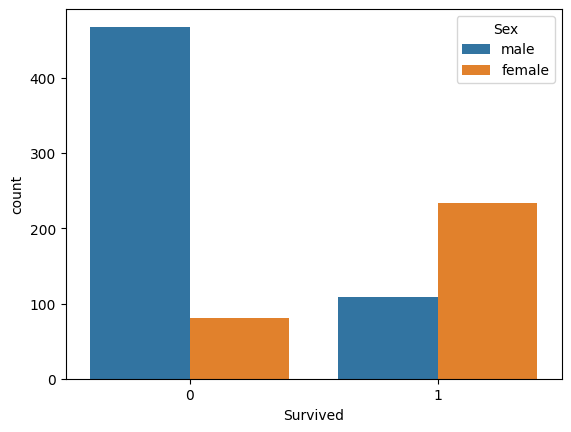

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x='Survived', data=df_titanic, hue='Sex')

–î–∞—Ç–∞—Å–µ—Ç: -
#### 8. –ö–∞–∫ –Ω–∞–π—Ç–∏ –æ–±—â–∏–µ –∑–Ω–∞—á–µ–Ω–∏—è –º–µ–∂–¥—É –¥–≤—É–º—è –º–∞—Å—Å–∏–≤–∞–º–∏?


In [56]:
import numpy as np

array1 = np.array([1, 2, 3, 4, 5])
array2 = np.array([4, 5, 6, 7, 8])

common_values = np.intersect1d(array1, array2)

print(common_values)


[4 5]



–î–∞—Ç–∞—Å–µ—Ç: -
#### 9.–°–æ–∑–¥–∞—Ç—å –¥–≤—É–º–µ—Ä–Ω—ã–π –º–∞—Å—Å–∏–≤ 30 –Ω–∞ 4, —Å–æ–¥–µ—Ä–∂–∞—â–∏–π —Å–ª—É—á–∞–π–Ω—ã–µ —Ü–µ–ª—ã–µ —á–∏—Å–ª–∞ –æ—Ç 0 –¥–æ 100. –ò–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∏—Ä—É—è –º–∞—Å—Å–∏–≤ –∫–∞–∫ 30 –≤–µ–∫—Ç–æ—Ä–æ–≤ –∏–∑ 4—Ö –∫–æ–º–ø–æ–Ω–µ–Ω—Ç, –≤–µ—Ä–Ω—É—Ç—å –º–∞—Å—Å–∏–≤ 5 –Ω–∞ 4, —Å–æ—Å—Ç–æ—è—â–∏–π –∏–∑ –≤–µ–∫—Ç–æ—Ä–æ–≤ —Å –Ω–∞–∏–±–æ–ª—å—à–µ–π –¥–ª–∏–Ω–æ–π (–µ–≤–∫–ª–∏–¥–æ–≤–æ–π –Ω–æ—Ä–º–æ–π).–†–µ—à–∏—Ç—å –∑–∞–¥–∞—á—É —Å—Ä–µ–¥—Å—Ç–≤–∞–º–∏ numpy –∏/–∏–ª–∏ pandas. –ù–µ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å —Ü–∏–∫–ª—ã –∏ –∫–æ–Ω—Å—Ç—Ä—É–∫—Ü–∏–∏ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–≥–æ Python —Ç–∞–º, –≥–¥–µ –º–æ–∂–Ω–æ –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç–∏ –¥–∞–Ω–Ω—ã—Ö –±–∏–±–ª–∏–æ—Ç–µ–∫.


In [60]:
array = np.random.randint(0, 100, size=(30, 4))
norms = np.linalg.norm(array, axis=1)
max_norm_indices = np.argsort(norms)[-5:]
result = array[max_norm_indices]

print(result)

[[63 95 52 63]
 [99 27 81 55]
 [89 92 47 61]
 [90 55 67 86]
 [86 93 84 53]]



–î–∞—Ç–∞—Å–µ—Ç: titanic.csv
#### 10. 
1. –í–µ—Ä–Ω–æ –ª–∏, —á—Ç–æ —Å—Ä–µ–¥–Ω–∏–π –≤–æ–∑—Ä–∞—Å—Ç –≤—ã–∂–∏–≤—à–∏—Ö –ª—é–¥–µ–π –≤—ã—à–µ, —á–µ–º —É –Ω–µ –≤—ã–∂–∏–≤—à–∏—Ö –ø–∞—Å—Å–∞–∂–∏—Ä–æ–≤? 
2. –ü—Ä–∞–≤–¥–∞ –ª–∏, —á—Ç–æ –∂–µ–Ω—â–∏–Ω—ã –≤—ã–∂–∏–≤–∞–ª–∏ —á–∞—â–µ –º—É–∂—á–∏–Ω? –ö–∞–∫–æ–≤—ã –¥–æ–ª–∏ –≤—ã–∂–∏–≤—à–∏—Ö –≤ –æ–±–µ–∏—Ö –≥—Ä—É–ø–ø–∞—Ö?


In [62]:
import pandas as pd 
df_titanic = pd.read_csv('data/titanic.csv')
df_titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [63]:
df_titanic.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [64]:
df_titanic.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

–î–∞—Ç–∞—Å–µ—Ç: titanic.csv
#### 11.
 1. –ü—Ä–∞–≤–¥–∞ –ª–∏, —á—Ç–æ –∂–µ–Ω—â–∏–Ω—ã –≤—ã–∂–∏–≤–∞–ª–∏ —á–∞—â–µ –º—É–∂—á–∏–Ω? –ö–∞–∫–æ–≤—ã –¥–æ–ª–∏ –≤—ã–∂–∏–≤—à–∏—Ö –≤ –æ–±–µ–∏—Ö –≥—Ä—É–ø–ø–∞—Ö? 
 2. –ù–∞–π–¥–∏—Ç–µ —Å–∞–º–æ–µ –ø–æ–ø—É–ª—è—Ä–Ω–æ–µ –∏–º—è —Å—Ä–µ–¥–∏ –ø–∞—Å—Å–∞–∂–∏—Ä–æ–≤ –¢–∏—Ç–∞–Ω–∏–∫–∞ –º—É–∂—Å–∫–æ–≥–æ –ø–æ–ª–∞.


In [66]:
import pandas as pd 
df_titanic = pd.read_csv('data/titanic.csv')
df_titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [67]:
df_titanic.groupby('Sex')['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

In [87]:
df_titanic[df_titanic['Sex'] == 'male']['Name'].apply(lambda x: x.split(',')[0]).value_counts().idxmax()

'Panula'

–î–∞—Ç–∞—Å–µ—Ç: minutes_n_ingredients_full.hdf5
 #### 11. –°—á–∏—Ç–∞–π—Ç–µ –¥–∞—Ç–∞—Å–µ—Ç recipe –∏–∑ —Ñ–∞–π–ª–∞ minutes_n_ingredients_full.hdf5 –≤ –≤–∏–¥–µ dask.array. –£–∫–∞–∂–∏—Ç–µ –∞—Ä–≥—É–º–µ–Ω—Ç chunks=(100_000, 3) –ø—Ä–∏ —Å–æ–∑–¥–∞–Ω–∏–∏ –º–∞—Å—Å–∏–≤–∞. –í—ã–≤–µ–¥–∏—Ç–µ –Ω–∞ —ç–∫—Ä–∞–Ω –æ—Å–Ω–æ–≤–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –º–∞—Å—Å–∏–≤–µ –∏ –≤—ã–±–µ—Ä–∏—Ç–µ —Ä–µ—Ü–µ–ø—Ç—ã, –≤—Ä–µ–º—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –∫–æ—Ç–æ—Ä—ã—Ö –º–µ–Ω—å—à–µ –º–µ–¥–∏–∞–Ω–Ω–æ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è.

In [103]:
import h5py
import dask.array as da

filename = 'minutes_n_ingredients_full.hdf5'
with h5py.File(filename, 'r') as f:
     dataset = f['recipe']
     dask_array = da.from_array(dataset[:], chunks=(100_000, 3))
    
mask = dask_array[:, 1] < dask_array[:, 1].mean()
result = da.compute(dask_array[mask])

print(result)

(array([[ 683970,      33,       9],
       [1089012,      23,       5],
       [1428572,       0,       5],
       ...,
       [1910650,      60,       2],
       [ 713836,       0,       9],
       [ 660699,      64,       8]]),)


–î–∞—Ç–∞—Å–µ—Ç: accounts.*.csv

#### 12. –í accounts.*.csv –Ω–∞–π—Ç–∏ id, –¥–ª—è –∫–æ—Ç–æ—Ä–æ–≥–æ –≤ —Å—Ç–æ–ª–±—Ü–µ amount –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è –Ω–∞–∏–±–æ–ª—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–Ω–∞—á–µ–Ω–∏–π, –∫—Ä–∞—Ç–Ω—ã—Ö 5  –∏ –Ω–µ –∫—Ä–∞—Ç–Ω—ã—Ö 10.

In [117]:
import dask.dataframe as dd
df = dd.read_csv('data/accounts/*.csv',dtype={'amount': 'float64'})
mask = (df['amount'] % 5 == 0) & (df['amount'] % 10 != 0)
df[mask].groupby('id').count()['names'].compute().idxmax()

137


–î–∞—Ç–∞—Å–µ—Ç: titanic.csv
#### 13.
1. –ö–∞–∫–æ–≤—ã –º–µ–¥–∏–∞–Ω–∞ –∏ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω–æ–µ –æ—Ç–∫–ª–æ–Ω–µ–Ω–∏–µ –ø–ª–∞—Ç–µ–∂–µ–π (Fare)? –û–∫—Ä—É–≥–ª–∏—Ç–µ –¥–æ 2 –¥–µ—Å—è—Ç–∏—á–Ω—ã—Ö –∑–Ω–∞–∫–æ–≤. 
2. –ü—Ä–∞–≤–¥–∞ –ª–∏, —á—Ç–æ –ª—é–¥–∏ –º–æ–ª–æ–∂–µ 30 –ª–µ—Ç –≤—ã–∂–∏–≤–∞–ª–∏ —á–∞—â–µ, —á–µ–º –ª—é–¥–∏ —Å—Ç–∞—Ä—à–µ 60 –ª–µ—Ç? –ö–∞–∫–æ–≤—ã –¥–æ–ª–∏ –≤—ã–∂–∏–≤—à–∏—Ö –≤ –æ–±–µ–∏—Ö –≥—Ä—É–ø–ø–∞—Ö?


In [138]:
import pandas as pd 
df_titanic = pd.read_csv('data/titanic.csv')
df_titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [139]:
round(df_titanic['Fare'].median(),2) , round(df_titanic['Fare'].std(),2)

(14.45, 49.69)

In [144]:
df_titanic[df_titanic['Age'] < 30]['Survived'].mean()

0.40625

In [145]:
df_titanic[df_titanic['Age'] > 60]['Survived'].mean()

0.22727272727272727

–î–∞—Ç–∞—Å–µ—Ç: all_k.zip
#### 14. –ü–æ–¥—Å—á–∏—Ç–∞—Ç—å, —Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è –∫–∞–∂–¥–∞—è –∏–∑ –∑–∞–≥–ª–∞–≤–Ω—ã—Ö —Ä—É—Å—Å–∫–∏—Ö –±—É–∫–≤ –≤ —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö —Ñ–∞–π–ª–∞—Ö, –ª–µ–∂–∞—â–∏—Ö –≤ all_k.zip. 
–í—ã–ø–æ–ª–Ω–∏—Ç—å –∑–∞–¥–∞–Ω–∏–µ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º Dask (–∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–º!), —Ä–∞—Å–ø–∞—Ä–∞–ª–ª–µ–ª–∏–≤ –ø—Ä–æ—Ü–µ—Å—Å –æ–±—Ä–∞–±–æ—Ç–∫–∏ –¥–∞–Ω–Ω—ã—Ö (–∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ Dask –¥–æ–ª–∂–Ω–æ –ø—Ä–∏–≤–æ–¥–∏—Ç—å –∫ –∏—Å—Ç–∏–Ω–Ω–æ–π –ø–∞—Ä–∞–ª–ª–µ–ª—å–Ω–æ–π –æ–±—Ä–∞–±–æ—Ç–∫–µ –¥–∞–Ω–Ω—ã—Ö).


In [150]:
import dask.bag as db
import os
import re
import nltk

all_k = "data/all_k"

all_k = db.read_text(os.path.join(all_k,"*.TXT"), encoding = 'windows-1251')
all_k = all_k.map(lambda x: x.strip())
all_k = all_k.filter(lambda x: x != '')

all_k = all_k.map(lambda x: len(re.findall(r'[–ê-–Ø–Å]', x)))
all_k.sum().compute()

6831240

–î–∞—Ç–∞—Å–µ—Ç: wine.csv.zip
#### 15.
1. –ù–∞–π—Ç–∏ –º–µ–¥–∏–∞–Ω—É –ø–æ–ª—è points –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ wine.csv.zip 
2. –û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ —Å—Ä–µ–¥–Ω—é—é –æ—Ü–µ–Ω–∫—É —Ä–µ–π—Ç–∏–Ω–≥–∞ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Ä–µ–≤—å—é–µ—Ä–∞ (–∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ 'taster_name' ,'points')


In [152]:
df_wine = pd.read_csv('data/winemag-data-130k-v2.csv')
df_wine = df_wine.drop('Unnamed: 0', axis = 1)
df_wine.head()

country                                        description  \
0     Italy  Aromas include tropical fruit, broom, brimston...   
1  Portugal  This is ripe and fruity, a wine that is smooth...   
2        US  Tart and snappy, the flavors of lime flesh and...   
3        US  Pineapple rind, lemon pith and orange blossom ...   
4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulk√† Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O‚ÄôKeefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulk√† Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine¬†      Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine¬†  Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

In [158]:
df_wine['points'].median()

88.0

In [159]:
df_wine.groupby('taster_name')['points'].mean()

taster_name
Alexander Peartree    85.855422
Anna Lee C. Iijima    88.415629
Anne Krebiehl¬†MW      90.562551
Carrie Dykes          86.395683
Christina Pickard     87.833333
Fiona Adams           86.888889
Jeff Jenssen          88.319756
Jim Gordon            88.626287
Joe Czerwinski        88.536235
Kerin O‚ÄôKeefe         88.867947
Lauren Buzzeo         87.739510
Matt Kettmann         90.008686
Michael Schachner     86.907493
Mike DeSimone         89.101167
Paul Gregutt          89.082564
Roger Voss            88.708003
Sean P. Sullivan      88.755739
Susan Kostrzewa       86.609217
Virginie Boone        89.213379
Name: points, dtype: float64

–î–∞—Ç–∞—Å–µ—Ç: reviews_full_mini
#### 16. –í —Ñ–∞–π–ª–∞—Ö –ø–∞–ø–∫–∏  reviews_full_mini –Ω–∞—Ö–æ–¥—è—Ç—Å—è —Ñ–∞–π–ª—ã, —Å–æ–¥–µ—Ä–∂–∞—â–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ–± –æ—Ç–∑—ã–≤–∞—Ö –∫ —Ä–µ—Ü–µ–ø—Ç–∞–º –≤ —Ñ–æ—Ä–º–∞—Ç–µ JSON Lines. –û—Ç–∑—ã–≤—ã —Ä–∞–∑–¥–µ–ª–µ–Ω—ã –Ω–∞ —Ñ–∞–π–ª—ã –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –æ—Ü–µ–Ω–∫–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –≤ —Ñ–∞–π–ª–µ reviews_1.json –Ω–∞—Ö–æ–¥—è—Ç—Å—è –æ—Ç–∑—ã–≤—ã —Å –æ—Ü–µ–Ω–∫–æ–π 1). –°—á–∏—Ç–∞–π—Ç–µ —Ñ–∞–π–ª—ã –∏–∑ —ç—Ç–æ–≥–æ –∞—Ä—Ö–∏–≤–∞ –≤ –≤–∏–¥–µ dask.bag. –ü—Ä–µ–æ–±—Ä–∞–∑—É–π—Ç–µ —Ç–µ–∫—Å—Ç–æ–≤–æ–µ —Å–æ–¥–µ—Ä–∂–∏–º–æ–µ —Ñ–∞–π–ª–æ–≤ –≤ –æ–±—ä–µ–∫—Ç—ã python (—Å –ø–æ–º–æ—â—å—é –º–æ–¥—É–ª—è json). –í—ã–≤–µ–¥–∏—Ç–µ –Ω–∞ —ç–∫—Ä–∞–Ω –ø–µ—Ä–≤—ã–µ 5 —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –ø–æ–ª—É—á–µ–Ω–Ω–æ–≥–æ bag. –ú–æ–¥–∏—Ñ–∏—Ü–∏—Ä—É–π—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é —Ä–∞–∑–±–æ—Ä–∞ JSON —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —á—Ç–æ–±—ã –≤ –∫–∞–∂–¥—ã–π —Å–ª–æ–≤–∞—Ä—å c –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–µ–π –æ–± –æ—Ç–∑—ã–≤–µ –¥–æ–±–∞–≤–∏—Ç—å –∫–ª—é—á rating. –ó–Ω–∞—á–µ–Ω–∏–µ –ø–æ–ª—É—á–∏—Ç–µ –Ω–∞ –æ—Å–Ω–æ–≤–µ –Ω–∞–∑–≤–∞–Ω–∏—è —Ñ–∞–π–ª–∞ (—Å–º. –∞—Ä–≥—É–º–µ–Ω—Ç include_path), –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–≤ –¥–ª—è —ç—Ç–æ–≥–æ —Ä–µ–≥—É–ª—è—Ä–Ω–æ–µ –≤—ã—Ä–∞–∂–µ–Ω–∏–µ.–í—ã–ø–æ–ª–Ω–∏—Ç–µ –ø—Ä–µ–ø—Ä–æ—Ü–µ—Å—Å–∏–Ω–≥ –æ—Ç–∑—ã–≤–æ–≤:
    * –ø—Ä–∏–≤–µ—Å—Ç–∏ —Å—Ç—Ä–æ–∫–∏ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É
    * –æ–±—Ä–µ–∑–∞—Ç—å –ø—Ä–æ–±–µ–ª—å–Ω—ã–µ —Å–∏–º–≤–æ–ª—ã –≤ –Ω–∞—á–∞–ª–µ –∏ –∫–æ–Ω—Ü–µ —Å—Ç—Ä–æ–∫–∏
    * —É–¥–∞–ª–∏—Ç–µ –≤—Å–µ —Å–∏–º–≤–æ–ª—ã, –∫—Ä–æ–º–µ –∞–Ω–≥–ª–∏–π—Å–∫–∏—Ö –±—É–∫–≤ –∏ –ø—Ä–æ–±–µ–ª–æ–≤


In [400]:
def json_review(x):
    review = x[0]
    new_json = json.loads(review)
    file = re.findall(r'reviews_\d\.json', x[1])[0]
    rating = re.findall(r'\d', file)[0]
    new_json["rating"] = int(rating)
    
    return new_json


In [171]:
def preprocessing(x):
    x["review"] = x["review"].lower()
    x["review"] = x["review"].strip()
    x["review"] = re.sub(r'[^a-z\s]', '', x["review"])
    return x

In [172]:
import dask.bag as db
import json

reviews_full = "data/reviews_full_mini"

reviews_db = db.read_text(os.path.join(reviews_full,"reviews_*.json"), include_path=True)
reviews_db = reviews_db.map(lambda x: json_review(x))
reviews_db = reviews_db.map(lambda x: preprocessing(x))
reviews_db.take(5)

({'user_id': 452355,
  'recipe_id': 292657,
  'date': '2016-05-08',
  'review': 'wow this is the best i have never been able to make homemade enchiladas that taste like the mexican restaurants i made this last night for my family and they said they will never have enchiladas at the mexican restaurants again thanks for sharing',
  'rating': '0'},
 {'user_id': 329304,
  'recipe_id': 433404,
  'date': '2006-06-14',
  'review': 'this was good but the dressing needed something and i found it to be a little too sweet next time i will experiment with some garlic and herbs and reduce the sugar slightly thanks for sharing kcdlongkitten',
  'rating': '0'},
 {'user_id': 227932,
  'recipe_id': 2008187,
  'date': '1985-11-19',
  'review': 'very goodit was a hit for my family i used  cloves of garlic and had  lb beef and  johnsonville sausage lb hot and   lb honey garlic which i wanted to use that was a perfect combo for us the sausage gave it nice flavor no guestion  i will be making this often',
 

–î–∞—Ç–∞—Å–µ—Ç: accounts.*.csv
#### 17. –í accounts.*.csv –Ω–∞–π—Ç–∏ id, –¥–ª—è –∫–æ—Ç–æ—Ä–æ–≥–æ –≤ —Å—Ç–æ–ª–±—Ü–µ amount –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è –Ω–∞–∏–±–æ–ª—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–Ω–∞—á–µ–Ω–∏–π, –∫—Ä–∞—Ç–Ω—ã—Ö —Ç—Ä–µ–º.


In [184]:
import dask.dataframe as dd
df = dd.read_csv('data/accounts/*.csv',dtype={'amount': 'float64'})
mask = df['amount'] % 3 == 0
df[mask].groupby('id').count()['names'].compute().idxmax()

137


–î–∞—Ç–∞—Å–µ—Ç: -
#### 18. –°–æ–∑–¥–∞–π—Ç–µ –µ–¥–∏–Ω–∏—á–Ω—É—é –º–∞—Ç—Ä–∏—Ü—É 3x3


In [189]:
import numpy as np

a = np.eye(3)
a

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

–î–∞—Ç–∞—Å–µ—Ç: -
#### 19. –°–æ–∑–¥–∞–π—Ç–µ –º–∞—Ç—Ä–∏—Ü—É —à–∞—Ö–º–∞—Ç–Ω–æ–π –¥–æ—Å–∫–∏ 8x8, –∏—Å–ø–æ–ª—å–∑—É—è —Ñ—É–Ω–∫—Ü–∏—é tile


In [191]:
import numpy as np

template = np.array([[0, 1], [1, 0]])

chessboard = np.tile(template, (4, 4))

print(chessboard)


[[0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]
 [0 1 0 1 0 1 0 1]
 [1 0 1 0 1 0 1 0]]


–î–∞—Ç–∞—Å–µ—Ç: wine.csv.zip
#### 20. 
1. –ü–æ–¥—Å—á–∏—Ç–∞–π—Ç–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤, –Ω–∞–ø–∏—Å–∞–Ω–Ω—ã—Ö –∫–∞–∂–¥—ã–º —á–µ–ª–æ–≤–µ–∫–æ–º ('taster_name') (–∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ groupby).–û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ —á–µ–ª–æ–≤–µ–∫–∞, –∫–æ—Ç–æ—Ä—ã–π –Ω–∞–ø–∏—Å–∞–ª –Ω–∞–∏–±–æ–ª—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–∑—ã–≤–æ–≤ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ wine.csv.zip. 
2. –û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ –º–∏–Ω–∏–º–∞–ª—å–Ω—ã–µ –∏ –º–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–µ —Ü–µ–Ω—ã –Ω–∞ –∫–∞–∂–¥—ã–π —Å–æ—Ä—Ç –≤–∏–Ω–∞ ('variety')? –û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ –Ω–∞–∑–≤–∞–Ω–∏–µ –∏ —Å–∞–º—ã–π –¥–æ—Ä–æ–≥–æ–π –≤–∏–¥ –≤–∏–Ω–∞.


In [193]:
df_wine = pd.read_csv('data/winemag-data-130k-v2.csv')
df_wine = df_wine.drop('Unnamed: 0', axis = 1)
df_wine

country                                        description  \
0          Italy  Aromas include tropical fruit, broom, brimston...   
1       Portugal  This is ripe and fruity, a wine that is smooth...   
2             US  Tart and snappy, the flavors of lime flesh and...   
3             US  Pineapple rind, lemon pith and orange blossom ...   
4             US  Much like the regular bottling from 2012, this...   
...          ...                                                ...   
129966   Germany  Notes of honeysuckle and cantaloupe sweeten th...   
129967        US  Citation is given as much as a decade of bottl...   
129968    France  Well-drained gravel soil gives this wine its c...   
129969    France  A dry style of Pinot Gris, this is crisp with ...   
129970    France  Big, rich and off-dry, this is powered by inte...   

                                   designation  points  price  \
0                                 Vulk√† Bianco      87    NaN   
1                                     Avidagos      87   15.0   
2                                          NaN      87   14.0   
3                         Reserve Late Harvest      87   13.0   
4           Vintner's Reserve Wild Child Block      87   65.0   
...                                        ...     ...    ...   
129966  Brauneberger Juffer-Sonnenuhr Sp√§tlese      90   28.0   
129967                                     NaN      90   75.0   
129968                                   Kritt      90   30.0   
129969                                     NaN      90   32.0   
129970           Lieu-dit Harth Cuv√©e Caroline      90   21.0   

                 province             region_1           region_2  \
0       Sicily & Sardinia                 Etna                NaN   
1                   Douro                  NaN                NaN   
2                  Oregon    Willamette Valley  Willamette Valley   
3                Michigan  Lake Michigan Shore                NaN   
4                  Oregon    Willamette Valley  Willamette Valley   
...                   ...                  ...                ...   
129966              Mosel                  NaN                NaN   
129967             Oregon               Oregon       Oregon Other   
129968             Alsace               Alsace                NaN   
129969             Alsace               Alsace                NaN   
129970             Alsace               Alsace                NaN   

               taster_name taster_twitter_handle  \
0            Kerin O‚ÄôKeefe          @kerinokeefe   
1               Roger Voss            @vossroger   
2             Paul Gregutt           @paulgwine¬†   
3       Alexander Peartree                   NaN   
4             Paul Gregutt           @paulgwine¬†   
...                    ...                   ...   
129966  Anna Lee C. Iijima                   NaN   
129967        Paul Gregutt           @paulgwine¬†   
129968          Roger Voss            @vossroger   
129969          Roger Voss            @vossroger   
129970          Roger Voss            @vossroger   

                                                    title         variety  \
0                       Nicosia 2013 Vulk√† Bianco  (Etna)     White Blend   
1           Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2           Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3       St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4       Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   
...                                                   ...             ...   
129966  Dr. H. Thanisch (Erben M√ºller-Burggraef) 2013 ...        Riesling   
129967                  Citation 2004 Pinot Noir (Oregon)      Pinot Noir   
129968  Domaine Gresser 2013 Kritt Gewurztraminer (Als...  Gew√ºrztraminer   
129969      Domaine Marcel Deiss 2012 Pinot Gris (Alsace)      Pinot Gris   
129970  Domaine Schoffit 2012 Lieu-dit Harth Cuv√©e Car...  Gew

In [195]:
df_wine.groupby('taster_name')['title'].count().sort_values().idxmax()

'Roger Voss'

In [196]:
df_wine.groupby('variety')['price'].max().sort_values().dropna()

variety
Trajadura                        7.0
Malagouzia-Chardonnay            8.0
Macabeo-Moscatel                 8.0
Bobal-Cabernet Sauvignon         9.0
Merseguera-Sauvignon Blanc       9.0
                               ...  
Bordeaux-style White Blend    1000.0
Gr√ºner Veltliner              1100.0
Chardonnay                    2013.0
Pinot Noir                    2500.0
Bordeaux-style Red Blend      3300.0
Name: price, Length: 697, dtype: float64

In [197]:
df_wine.dropna().groupby('variety')['price'].min().sort_values().dropna()

variety
Chardonnay                         4.0
Sparkling Blend                    5.0
White Riesling                     7.0
Muscat                             7.0
White Blend                        7.0
                                  ... 
Malbec-Cabernet Sauvignon         55.0
Syrah-Merlot                      59.0
Gew√ºrztraminer-Riesling           60.0
Tempranillo-Cabernet Sauvignon    65.0
Abouriou                          75.0
Name: price, Length: 183, dtype: float64

–î–∞—Ç–∞—Å–µ—Ç: Chinook_Sqlite.sqlite 
#### 21. –° –ø–æ–º–æ—â—å—é –∫–æ–¥–∞ –Ω–∞ Python —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º sqlite3 –∏ SQL —Ä–µ—à–∏—Ç—å –∑–∞–¥–∞—á—É. –†–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏–∏ –Ω–∞ Python:
1. –ö–æ—Ç–æ—Ä–∞—è –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –≤—Å–µ—Ö –∏–º–µ—é—â–∏—Ö—Å—è –∞—Ä—Ç–∏—Å—Ç–æ–≤. 
2. –ö–æ—Ç–æ—Ä–∞—è –ø–æ –∏–º–µ–Ω–∏ –∞—Ä—Ç–∏—Å—Ç–∞ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –≤—Å–µ –µ–≥–æ –∞–ª—å–±–æ–º—ã —Å –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º —Ç—Ä–µ–∫–æ–≤ –≤ –Ω–∏—Ö.


In [208]:
import sqlite3

# –ü–æ–¥–∫–ª—é—á–µ–Ω–∏–µ –∫ –±–∞–∑–µ –¥–∞–Ω–Ω—ã—Ö
conn = sqlite3.connect('data/Chinook_Sqlite.sqlite')
cursor = conn.cursor()

query = "SELECT name FROM sqlite_master WHERE type='table';"
cursor.execute(query)
tables = cursor.fetchall()

# –í—ã–≤–æ–¥ —Å–ø–∏—Å–∫–∞ —Ç–∞–±–ª–∏—Ü
for table in tables:
    print(table[0])


Album
Artist
Customer
Employee
Genre
Invoice
InvoiceLine
MediaType
Playlist
PlaylistTrack
Track


In [210]:
query1 = "SELECT * FROM Artist"
cursor.execute(query1)
res = cursor.fetchall()
res

[(1, 'AC/DC'),
 (2, 'Accept'),
 (3, 'Aerosmith'),
 (4, 'Alanis Morissette'),
 (5, 'Alice In Chains'),
 (6, 'Ant√¥nio Carlos Jobim'),
 (7, 'Apocalyptica'),
 (8, 'Audioslave'),
 (9, 'BackBeat'),
 (10, 'Billy Cobham'),
 (11, 'Black Label Society'),
 (12, 'Black Sabbath'),
 (13, 'Body Count'),
 (14, 'Bruce Dickinson'),
 (15, 'Buddy Guy'),
 (16, 'Caetano Veloso'),
 (17, 'Chico Buarque'),
 (18, 'Chico Science & Na√ß√£o Zumbi'),
 (19, 'Cidade Negra'),
 (20, 'Cl√°udio Zoli'),
 (21, 'Various Artists'),
 (22, 'Led Zeppelin'),
 (23, 'Frank Zappa & Captain Beefheart'),
 (24, 'Marcos Valle'),
 (25, 'Milton Nascimento & Bebeto'),
 (26, 'Azymuth'),
 (27, 'Gilberto Gil'),
 (28, 'Jo√£o Gilberto'),
 (29, 'Bebel Gilberto'),
 (30, 'Jorge Vercilo'),
 (31, 'Baby Consuelo'),
 (32, 'Ney Matogrosso'),
 (33, 'Luiz Melodia'),
 (34, 'Nando Reis'),
 (35, 'Pedro Lu√≠s & A Parede'),
 (36, 'O Rappa'),
 (37, 'Ed Motta'),
 (38, 'Banda Black Rio'),
 (39, 'Fernanda Porto'),
 (40, 'Os Cariocas'),
 (41, 'Elis Regina'),
 (4

In [215]:
query2 = """
    SELECT *
    FROM Track
    """
cursor.execute(query2)
cursor.description

(('TrackId', None, None, None, None, None, None),
 ('Name', None, None, None, None, None, None),
 ('AlbumId', None, None, None, None, None, None),
 ('MediaTypeId', None, None, None, None, None, None),
 ('GenreId', None, None, None, None, None, None),
 ('Composer', None, None, None, None, None, None),
 ('Milliseconds', None, None, None, None, None, None),
 ('Bytes', None, None, None, None, None, None),
 ('UnitPrice', None, None, None, None, None, None))

In [218]:
query2 = """
    SELECT Album.Title, COUNT(Track.TrackId) AS TrackCount
    FROM Album
    JOIN Artist ON Album.ArtistId = Artist.ArtistId
    JOIN Track ON Album.AlbumId = Track.AlbumId
    WHERE Artist.Name = ?
    GROUP BY Album.AlbumId;
    """
cursor.execute(query2, (input(),))
res = cursor.fetchall()
res

AC/DC


[('For Those About To Rock We Salute You', 10), ('Let There Be Rock', 8)]

–î–∞—Ç–∞—Å–µ—Ç: minutes_n_ingredients_full.hdf5
#### 22. –°—á–∏—Ç–∞–π—Ç–µ –¥–∞—Ç–∞—Å–µ—Ç recipe –∏–∑ —Ñ–∞–π–ª–∞ minutes_n_ingredients_full.hdf5 –≤ –≤–∏–¥–µ dask.array. –£–∫–∞–∂–∏—Ç–µ –∞—Ä–≥—É–º–µ–Ω—Ç chunks=(100_000, 3) –ø—Ä–∏ —Å–æ–∑–¥–∞–Ω–∏–∏ –º–∞—Å—Å–∏–≤–∞. –í—ã–≤–µ–¥–∏—Ç–µ –Ω–∞ —ç–∫—Ä–∞–Ω –æ—Å–Ω–æ–≤–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –º–∞—Å—Å–∏–≤–µ –∏ —Å–æ–∑–¥–∞–π—Ç–µ –º–∞—Å—Å–∏–≤ dask.array –∏–∑ 2 —á–∏—Å–µ–ª, —Å–æ–¥–µ—Ä–∂–∞—â–∏—Ö –≤–∞—à–∏ –ø—Ä–µ–¥–ø–æ—á—Ç–µ–Ω–∏—è –æ—Ç–Ω–æ—Å–∏—Ç–µ–ª—å–Ω–æ –≤—Ä–µ–º–µ–Ω–∏ –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è —Ä–µ—Ü–µ–ø—Ç–∞ –∏ –∫–æ–ª-–≤–∞ –∏–Ω–≥—Ä–µ–¥–∏–µ–Ω—Ç–æ–≤. –ù–∞–π–¥–∏—Ç–µ –Ω–∞–∏–±–æ–ª–µ–µ –ø–æ—Ö–æ–∂–∏–π (–≤ —Å–º—ã—Å–ª–µ ùêø1 ) —Ä–µ—Ü–µ–ø—Ç –∏–∑ –∏–º–µ—é—â–∏—Ö—Å—è –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ.
 


In [239]:
import h5py
import dask.array as da

# –ß—Ç–µ–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–∞
filename = 'minutes_n_ingredients_full.hdf5'
dask_array = da.from_array(h5py.File(filename, 'r')['recipe'], chunks=(100_000, 3))
request = da.array([10, 5])

diff = request - dask_array[:, 1:]
mask = da.argmin(da.abs(diff).sum(axis=1))
mask.compute()

158

–î–∞—Ç–∞—Å–µ—Ç: wine.csv.zip
#### 23.
1. –ü–æ–¥—Å—á–∏—Ç–∞–π—Ç–µ, —Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ "tropical" –∏ "fruity" –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è –≤ –æ–ø–∏—Å–∞–Ω–∏—è—Ö –≤–∏–Ω–∞ (description) –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ wine.csv.zip. (–ù–µ–æ–±—Ö–æ–¥–∏–º–æ —É—á–µ—Å—Ç—å —Ä–µ–≥–∏—Å—Ç—Ä) 
2. –û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ —Å—Ä–µ–¥–Ω—é—é –æ—Ü–µ–Ω–∫—É —Ä–µ–π—Ç–∏–Ω–≥–∞ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ —Ä–µ–≤—å—é–µ—Ä–∞ (–∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ 'taster_name' ,'points')


In [240]:
df_wine = pd.read_csv('data/winemag-data-130k-v2.csv')
df_wine = df_wine.drop('Unnamed: 0', axis = 1)
df_wine

country                                        description  \
0          Italy  Aromas include tropical fruit, broom, brimston...   
1       Portugal  This is ripe and fruity, a wine that is smooth...   
2             US  Tart and snappy, the flavors of lime flesh and...   
3             US  Pineapple rind, lemon pith and orange blossom ...   
4             US  Much like the regular bottling from 2012, this...   
...          ...                                                ...   
129966   Germany  Notes of honeysuckle and cantaloupe sweeten th...   
129967        US  Citation is given as much as a decade of bottl...   
129968    France  Well-drained gravel soil gives this wine its c...   
129969    France  A dry style of Pinot Gris, this is crisp with ...   
129970    France  Big, rich and off-dry, this is powered by inte...   

                                   designation  points  price  \
0                                 Vulk√† Bianco      87    NaN   
1                                     Avidagos      87   15.0   
2                                          NaN      87   14.0   
3                         Reserve Late Harvest      87   13.0   
4           Vintner's Reserve Wild Child Block      87   65.0   
...                                        ...     ...    ...   
129966  Brauneberger Juffer-Sonnenuhr Sp√§tlese      90   28.0   
129967                                     NaN      90   75.0   
129968                                   Kritt      90   30.0   
129969                                     NaN      90   32.0   
129970           Lieu-dit Harth Cuv√©e Caroline      90   21.0   

                 province             region_1           region_2  \
0       Sicily & Sardinia                 Etna                NaN   
1                   Douro                  NaN                NaN   
2                  Oregon    Willamette Valley  Willamette Valley   
3                Michigan  Lake Michigan Shore                NaN   
4                  Oregon    Willamette Valley  Willamette Valley   
...                   ...                  ...                ...   
129966              Mosel                  NaN                NaN   
129967             Oregon               Oregon       Oregon Other   
129968             Alsace               Alsace                NaN   
129969             Alsace               Alsace                NaN   
129970             Alsace               Alsace                NaN   

               taster_name taster_twitter_handle  \
0            Kerin O‚ÄôKeefe          @kerinokeefe   
1               Roger Voss            @vossroger   
2             Paul Gregutt           @paulgwine¬†   
3       Alexander Peartree                   NaN   
4             Paul Gregutt           @paulgwine¬†   
...                    ...                   ...   
129966  Anna Lee C. Iijima                   NaN   
129967        Paul Gregutt           @paulgwine¬†   
129968          Roger Voss            @vossroger   
129969          Roger Voss            @vossroger   
129970          Roger Voss            @vossroger   

                                                    title         variety  \
0                       Nicosia 2013 Vulk√† Bianco  (Etna)     White Blend   
1           Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2           Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3       St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4       Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   
...                                                   ...             ...   
129966  Dr. H. Thanisch (Erben M√ºller-Burggraef) 2013 ...        Riesling   
129967                  Citation 2004 Pinot Noir (Oregon)      Pinot Noir   
129968  Domaine Gresser 2013 Kritt Gewurztraminer (Als...  Gew√ºrztraminer   
129969      Domaine Marcel Deiss 2012 Pinot Gris (Alsace)      Pinot Gris   
129970  Domaine Schoffit 2012 Lieu-dit Harth Cuv√©e Car...  Gew

In [249]:
count_tropical = df_wine['description'].str.contains('tropical', case=False).sum()
count_fruity = df_wine['description'].str.contains('fruity', case=False).sum() 

print("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞–∑ 'tropical' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è –≤ –æ–ø–∏—Å–∞–Ω–∏—è—Ö –≤–∏–Ω–∞:", count_tropical)
print("–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞–∑ 'fruity' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è –≤ –æ–ø–∏—Å–∞–Ω–∏—è—Ö –≤–∏–Ω–∞:", count_fruity)

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞–∑ 'tropical' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è –≤ –æ–ø–∏—Å–∞–Ω–∏—è—Ö –≤–∏–Ω–∞: 3800
–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞–∑ 'fruity' –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è –≤ –æ–ø–∏—Å–∞–Ω–∏—è—Ö –≤–∏–Ω–∞: 9455


In [241]:
df_wine.groupby('taster_name')['points'].mean().sort_values()

taster_name
Alexander Peartree    85.855422
Carrie Dykes          86.395683
Susan Kostrzewa       86.609217
Fiona Adams           86.888889
Michael Schachner     86.907493
Lauren Buzzeo         87.739510
Christina Pickard     87.833333
Jeff Jenssen          88.319756
Anna Lee C. Iijima    88.415629
Joe Czerwinski        88.536235
Jim Gordon            88.626287
Roger Voss            88.708003
Sean P. Sullivan      88.755739
Kerin O‚ÄôKeefe         88.867947
Paul Gregutt          89.082564
Mike DeSimone         89.101167
Virginie Boone        89.213379
Matt Kettmann         90.008686
Anne Krebiehl¬†MW      90.562551
Name: points, dtype: float64

–î–∞—Ç–∞—Å–µ—Ç: -
#### 24. –ù–∞–ø–∏—à–∏—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é –Ω–∞ Python, –∫–æ—Ç–æ—Ä–∞—è –≤—ã—á–∏—Å–ª—è–µ—Ç —Å—É–º–º—É –∫–≤–∞–¥—Ä–∞—Ç–æ–≤ –≤—Å–µ—Ö —á–∏—Å–µ–ª –≤ —Å–ø–∏—Å–∫–µ —Ä–∞–∑–º–µ—Ä–∞ N, —Å–æ–¥–µ—Ä–∂–∞—â–µ–º —Ü–µ–ª—ã–µ —Å–ª—É—á–∞–π–Ω–æ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ —á–∏—Å–ª–∞. –ó–∞—Ç–µ–º –Ω–∞–ø–∏—à–∏—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é, —Å–∫–æ–º–ø–∏–ª–∏—Ä–æ–≤–∞–Ω–Ω—É—é —Å –ø–æ–º–æ—â—å—é Numba, –∫–æ—Ç–æ—Ä–∞—è –≤—ã–ø–æ–ª–Ω—è–µ—Ç —Ç—É –∂–µ –∑–∞–¥–∞—á—É, –∏ —Å—Ä–∞–≤–Ω–∏—Ç–µ –≤—Ä–µ–º—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –æ–±–µ–∏—Ö —Ñ—É–Ω–∫—Ü–∏–π. –°—Ä–∞–≤–Ω–∏—Ç–µ —Å–∫–æ—Ä–æ—Å—Ç—å –ø—Ä–∏ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö N –∏ —Å–¥–µ–ª–∞–π—Ç–µ –≤—ã–≤–æ–¥.


In [261]:
def sum_of_squares_python(numbers):
    total = 0
    for num in numbers:
        total += num ** 2
    return total

In [267]:
import numba as nb

@nb.jit(nopython=True)
def sum_of_squares_numba(numbers):
    total = 0
    for num in numbers:
        total += num ** 2
    return total


In [280]:
import random
numbers = np.array([random.randint(1, 100) for _ in range(1000000)])

In [281]:
%%time
sum_of_squares_numba(numbers)

CPU times: user 985 ¬µs, sys: 16 ¬µs, total: 1 ms
Wall time: 1.02 ms


3384157703

In [282]:
%%time
sum_of_squares_python(numbers)

CPU times: user 236 ms, sys: 3.17 ms, total: 239 ms
Wall time: 238 ms


3384157703

–î–∞—Ç–∞—Å–µ—Ç: accounts.*.csv
#### 25. –í accounts.*.csv –Ω–∞–π—Ç–∏ id, –¥–ª—è –∫–æ—Ç–æ—Ä–æ–≥–æ –≤ —Å—Ç–æ–ª–±—Ü–µ amount –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è –Ω–∞–∏–±–æ–ª—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∑–Ω–∞—á–µ–Ω–∏–π –º–µ–∂–¥—É 1000 –∏ 1500.


In [286]:
import dask.dataframe as dd
df = dd.read_csv('data/accounts/*.csv',dtype={'amount': 'float64'})
mask = (df['amount']  > 1000) & (df['amount']  < 1500)
df[mask].groupby('id').count()['names'].compute().idxmax()

473

–î–∞—Ç–∞—Å–µ—Ç: titanic.csv
#### 26.
1. –í–µ—Ä–Ω–æ –ª–∏, —á—Ç–æ —Å—Ä–µ–¥–Ω–∏–π –≤–æ–∑—Ä–∞—Å—Ç –≤—ã–∂–∏–≤—à–∏—Ö –ª—é–¥–µ–π –≤—ã—à–µ, —á–µ–º —É –Ω–µ –≤—ã–∂–∏–≤—à–∏—Ö –ø–∞—Å—Å–∞–∂–∏—Ä–æ–≤? 


In [288]:
import pandas as pd 
df_titanic = pd.read_csv('data/titanic.csv')
df_titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [289]:
df_titanic.groupby('Survived')['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

–î–∞—Ç–∞—Å–µ—Ç: Chinook_Sqlite.sqlite 
#### 27. –° –ø–æ–º–æ—â—å—é –∫–æ–¥–∞ –Ω–∞ Python —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º sqlite3 –∏ SQL —Ä–µ—à–∏—Ç—å –∑–∞–¥–∞—á—É. –†–µ–∞–ª–∏–∑–æ–≤–∞—Ç—å —Ñ—É–Ω–∫—Ü–∏–∏ –Ω–∞ Python:
1. –ö–æ—Ç–æ—Ä–∞—è –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –≤—Å–µ –∏–º–µ—é—â–∏–µ—Å—è –ø–ª–µ–π–ª–∏—Å—Ç—ã. 
2. –ö–æ—Ç–æ—Ä–∞—è –ø–æ –∏–º–µ–Ω–∏ –ø–ª–µ–π–ª–∏—Å—Ç–∞ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ç—Ä–µ–∫–æ–≤ –≤ –Ω–µ–º –∏ –∏—Ö —Å—É–º–º–∞—Ä–Ω—É—é –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å.


In [292]:
import sqlite3

# –ü–æ–¥–∫–ª—é—á–µ–Ω–∏–µ –∫ –±–∞–∑–µ –¥–∞–Ω–Ω—ã—Ö
conn = sqlite3.connect('data/Chinook_Sqlite.sqlite')
cursor = conn.cursor()

query = "SELECT name FROM sqlite_master WHERE type='table';"
cursor.execute(query)
tables = cursor.fetchall()
tables

[('Album',),
 ('Artist',),
 ('Customer',),
 ('Employee',),
 ('Genre',),
 ('Invoice',),
 ('InvoiceLine',),
 ('MediaType',),
 ('Playlist',),
 ('PlaylistTrack',),
 ('Track',)]

In [311]:
query = "SELECT * FROM Track"
cursor.execute(query)
cursor.description
# tables = cursor.fetchall()
# tables

(('TrackId', None, None, None, None, None, None),
 ('Name', None, None, None, None, None, None),
 ('AlbumId', None, None, None, None, None, None),
 ('MediaTypeId', None, None, None, None, None, None),
 ('GenreId', None, None, None, None, None, None),
 ('Composer', None, None, None, None, None, None),
 ('Milliseconds', None, None, None, None, None, None),
 ('Bytes', None, None, None, None, None, None),
 ('UnitPrice', None, None, None, None, None, None))

In [312]:
query = """SELECT COUNT(*), SUM(Track.Milliseconds) FROM Playlist
        JOIN PlaylistTrack ON Playlist.PlaylistId = PlaylistTrack.PlaylistId 
        JOIN Track ON PlaylistTrack.TrackId = Track.TrackId
        WHERE Playlist.name = ? """
cursor.execute(query, (input(),))
tables = cursor.fetchall()
tables



Music


[(6580, 1755366166)]

–î–∞—Ç–∞—Å–µ—Ç: all_k.zip
#### 28. –ü–æ–¥—Å—á–∏—Ç–∞—Ç—å, —Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –≤–æ –≤—Å–µ—Ö —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö —Ñ–∞–π–ª–∞—Ö, –ª–µ–∂–∞—â–∏—Ö –≤ all_k.zip, –≤—Å—Ç—Ä–µ—á–∞—é—Ç—Å—è —Ä–µ–ø–ª–∏–∫–∏ –ø—Ä—è–º–æ–π —Ä–µ—á–∏, –æ—Ñ–æ—Ä–º–ª–µ–Ω–Ω—ã–µ –≤ –≤–∏–¥–µ –¥–∏–∞–ª–æ–≥–∞ (–í —ç—Ç–æ–º —Å–ª—É—á–∞–µ –∫–∞–∂–¥–∞—è —Ä–µ–ø–ª–∏–∫–∞ –Ω–∞—á–∏–Ω–∞–µ—Ç—Å—è —Å –Ω–æ–≤–æ–π —Å—Ç—Ä–æ–∫–∏, –ø–µ—Ä–µ–¥ —Ä–µ–ø–ª–∏–∫–∞–º–∏ —Å—Ç–∞–≤–∏—Ç—Å—è —Ç–∏—Ä–µ (–ø–µ—Ä–µ–¥ —Ç–∏—Ä–µ –≤–æ–∑–º–æ–∂–Ω—ã —Ä–∞–∑–ª–∏—á–Ω—ã–µ –ø—Ä–æ–±–µ–ª—å–Ω—ã–µ —Å–∏–º–≤–æ–ª—ã). –í—ã–ø–æ–ª–Ω–∏—Ç—å –∑–∞–¥–∞–Ω–∏–µ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º Dask, —Ä–∞—Å–ø–∞—Ä–∞–ª–ª–µ–ª–∏–≤ –ø—Ä–æ—Ü–µ—Å—Å –æ–±—Ä–∞–±–æ—Ç–∫–∏ –¥–∞–Ω–Ω—ã—Ö.


In [386]:
import dask.bag as db
import os
import re
import nltk

all_k = "data/all_k"

all_k = db.read_text(os.path.join(all_k,"*.TXT"), encoding = 'windows-1251')
all_k = all_k.map(lambda x: x.strip())
all_k = all_k.filter(lambda x: x != '')
sentences = all_k.map(lambda x: nltk.sent_tokenize(x))
sentences = sentences.flatten()
sentences = sentences.map(lambda x: x.startswith('-'))
sentences.sum().compute()

782021

–î–∞—Ç–∞—Å–µ—Ç: titanic.csv
#### 31.
1. –í—ã–≤–µ–¥–∏—Ç–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –ø–µ—Ä–µ–º–µ–Ω–Ω–æ–π Pclass (—Å–æ—Ü–∏–∞–ª—å–Ω–æ-—ç–∫–æ–Ω–æ–º–∏—á–µ—Å–∫–∏–π —Å—Ç–∞—Ç—É—Å) –∏ —ç—Ç–æ –∂–µ —Ä–∞—Å–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ, —Ç–æ–ª—å–∫–æ –¥–ª—è –º—É–∂—á–∏–Ω / –∂–µ–Ω—â–∏–Ω –ø–æ –æ—Ç–¥–µ–ª—å–Ω–æ—Å—Ç–∏. –°–∫–æ–ª—å–∫–æ –±—ã–ª–æ –º—É–∂—á–∏–Ω 2-–≥–æ –∫–ª–∞—Å—Å–∞? 


In [314]:
df = pd.read_csv('titanic.csv')
df.groupby('Sex')['Pclass'].value_counts().sort_index()

Sex     Pclass
female  1          94
        2          76
        3         144
male    1         122
        2         108
        3         347
Name: Pclass, dtype: int64

In [315]:
df.groupby('Sex')['Pclass'].value_counts().sort_index()['male'][3]

347

–î–∞—Ç–∞—Å–µ—Ç: -
#### 37.–ù–∞–ø–∏—à–∏—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é, –∫–æ—Ç–æ—Ä–∞—è –ø—Ä–∏–Ω–∏–º–∞–µ—Ç –Ω–∞ –≤—Ö–æ–¥ –¥–≤–∞ —Å–ø–∏—Å–∫–∞ —Å–ª—É—á–∞–π–Ω–æ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö —Ü–µ–ª—ã—Ö —á–∏—Å–µ–ª,–∫–∞–∂–¥—ã–π —Ä–∞–∑–º–µ—Ä–∞ N, –∏ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç –Ω–æ–≤—ã–π —Å–ø–∏—Å–æ–∫, –≤ –∫–æ—Ç–æ—Ä–æ–º –∫–∞–∂–¥—ã–π —ç–ª–µ–º–µ–Ω—Ç —è–≤–ª—è–µ—Ç—Å—è —Å—É–º–º–æ–π —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–∏—Ö —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –≤–æ –≤—Ö–æ–¥–Ω—ã—Ö —Å–ø–∏—Å–∫–∞—Ö. –ù–∞–ø—Ä–∏–º–µ—Ä, –µ—Å–ª–∏ –≤—Ö–æ–¥–Ω—ã–º–∏ —Å–ø–∏—Å–∫–∞–º–∏ —è–≤–ª—è—é—Ç—Å—è [1, 2, 3] –∏ [4, 5, 6], —Ñ—É–Ω–∫—Ü–∏—è –¥–æ–ª–∂–Ω–∞ –≤–µ—Ä–Ω—É—Ç—å [5, 7, 9].–ó–∞—Ç–µ–º –Ω–∞–ø–∏—à–∏—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é, —Å–∫–æ–º–ø–∏–ª–∏—Ä–æ–≤–∞–Ω–Ω—É—é —Å –ø–æ–º–æ—â—å—é Numba, –∫–æ—Ç–æ—Ä–∞—è –≤—ã–ø–æ–ª–Ω—è–µ—Ç —Ç—É –∂–µ –∑–∞–¥–∞—á—É, –∏ —Å—Ä–∞–≤–Ω–∏—Ç–µ –≤—Ä–µ–º—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –æ–±–µ–∏—Ö —Ñ—É–Ω–∫—Ü–∏–π. –°—Ä–∞–≤–Ω–∏—Ç–µ —Å–∫–æ—Ä–æ—Å—Ç—å –ø—Ä–∏ —Ä–∞–∑–ª–∏—á–Ω—ã—Ö N –∏ —Å–¥–µ–ª–∞–π—Ç–µ –≤—ã–≤–æ–¥.


In [317]:
import random

def sum_lists_python(list1, list2):
    return [x + y for x, y in zip(list1, list2)]


In [318]:
import numba as nb

@nb.jit(nopython=True)
def sum_lists_numba(list1, list2):
    result = []
    for i in range(len(list1)):
        result.append(list1[i] + list2[i])
    return result


In [330]:
list1 = np.random.randint(1,100, size=10000)
list2 = np.random.randint(1,100, size=10000)

In [334]:
%%time
sum_lists_python(list1, list2)

CPU times: user 6.42 ms, sys: 1.01 ms, total: 7.43 ms
Wall time: 6.68 ms


[136,
 179,
 109,
 165,
 85,
 136,
 54,
 40,
 181,
 119,
 90,
 187,
 135,
 153,
 46,
 163,
 136,
 85,
 117,
 133,
 154,
 92,
 121,
 83,
 116,
 77,
 69,
 116,
 47,
 107,
 16,
 102,
 37,
 144,
 32,
 78,
 141,
 106,
 61,
 171,
 83,
 94,
 143,
 182,
 79,
 113,
 130,
 97,
 167,
 64,
 78,
 75,
 144,
 113,
 134,
 104,
 148,
 101,
 157,
 138,
 129,
 171,
 60,
 97,
 74,
 102,
 96,
 156,
 53,
 137,
 86,
 151,
 107,
 67,
 93,
 68,
 79,
 146,
 102,
 120,
 119,
 86,
 40,
 22,
 58,
 119,
 34,
 78,
 96,
 92,
 71,
 129,
 125,
 90,
 76,
 187,
 102,
 56,
 103,
 36,
 40,
 77,
 92,
 35,
 38,
 28,
 129,
 165,
 120,
 91,
 98,
 121,
 121,
 89,
 56,
 37,
 125,
 152,
 135,
 75,
 90,
 113,
 171,
 116,
 84,
 102,
 34,
 155,
 57,
 152,
 54,
 61,
 113,
 118,
 99,
 56,
 160,
 84,
 58,
 139,
 72,
 77,
 139,
 149,
 141,
 38,
 127,
 170,
 53,
 110,
 122,
 89,
 88,
 53,
 77,
 114,
 143,
 29,
 153,
 81,
 111,
 136,
 138,
 106,
 155,
 70,
 182,
 125,
 143,
 116,
 37,
 76,
 19,
 144,
 113,
 115,
 80,
 93,
 54,
 94,
 107,


In [333]:
%%time
sum_lists_numba(list1, list2)

CPU times: user 414 ¬µs, sys: 28 ¬µs, total: 442 ¬µs
Wall time: 485 ¬µs


[136,
 179,
 109,
 165,
 85,
 136,
 54,
 40,
 181,
 119,
 90,
 187,
 135,
 153,
 46,
 163,
 136,
 85,
 117,
 133,
 154,
 92,
 121,
 83,
 116,
 77,
 69,
 116,
 47,
 107,
 16,
 102,
 37,
 144,
 32,
 78,
 141,
 106,
 61,
 171,
 83,
 94,
 143,
 182,
 79,
 113,
 130,
 97,
 167,
 64,
 78,
 75,
 144,
 113,
 134,
 104,
 148,
 101,
 157,
 138,
 129,
 171,
 60,
 97,
 74,
 102,
 96,
 156,
 53,
 137,
 86,
 151,
 107,
 67,
 93,
 68,
 79,
 146,
 102,
 120,
 119,
 86,
 40,
 22,
 58,
 119,
 34,
 78,
 96,
 92,
 71,
 129,
 125,
 90,
 76,
 187,
 102,
 56,
 103,
 36,
 40,
 77,
 92,
 35,
 38,
 28,
 129,
 165,
 120,
 91,
 98,
 121,
 121,
 89,
 56,
 37,
 125,
 152,
 135,
 75,
 90,
 113,
 171,
 116,
 84,
 102,
 34,
 155,
 57,
 152,
 54,
 61,
 113,
 118,
 99,
 56,
 160,
 84,
 58,
 139,
 72,
 77,
 139,
 149,
 141,
 38,
 127,
 170,
 53,
 110,
 122,
 89,
 88,
 53,
 77,
 114,
 143,
 29,
 153,
 81,
 111,
 136,
 138,
 106,
 155,
 70,
 182,
 125,
 143,
 116,
 37,
 76,
 19,
 144,
 113,
 115,
 80,
 93,
 54,
 94,
 107,


–î–∞—Ç–∞—Å–µ—Ç: minutes_n_ingredients_full.hdf5
#### 40.  –°—á–∏—Ç–∞–π—Ç–µ –¥–∞—Ç–∞—Å–µ—Ç recipe –∏–∑ —Ñ–∞–π–ª–∞ minutes_n_ingredients_full.hdf5 –≤ –≤–∏–¥–µ dask.array. –£–∫–∞–∂–∏—Ç–µ –∞—Ä–≥—É–º–µ–Ω—Ç chunks=(100_000, 3) –ø—Ä–∏ —Å–æ–∑–¥–∞–Ω–∏–∏ –º–∞—Å—Å–∏–≤–∞. –í—ã–≤–µ–¥–∏—Ç–µ –Ω–∞ —ç–∫—Ä–∞–Ω –æ—Å–Ω–æ–≤–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –º–∞—Å—Å–∏–≤–µ –∏ –ø–æ—Å—á–∏—Ç–∞–π—Ç–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–∞–∂–¥–æ–≥–æ –∏–∑ –≤–æ–∑–º–æ–∂–Ω—ã—Ö –∑–Ω–∞—á–µ–Ω–∏–π –∫–æ–ª-–≤–∞ –∏–Ω–≥—Ä–µ–¥–∏–µ–Ω—Ç–æ–≤.


In [345]:
import h5py
import dask.array as da

# –ß—Ç–µ–Ω–∏–µ –¥–∞—Ç–∞—Å–µ—Ç–∞
filename = 'minutes_n_ingredients_full.hdf5'
dask_array = da.from_array(h5py.File(filename, 'r')['recipe'], chunks=(100_000, 3))
da.unique(dask_array[:,2], return_counts=True)[0].compute(), da.unique(dask_array[:,2], return_counts=True)[1].compute()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 43]),
 array([222071, 224158, 229388, 234948, 240720, 244360, 247181, 246747,
        246816,  22430,  19094,  15165,  11640,   8284,   6014,   4145,
          2793,   1913,   1279,    852,    529,    346,    244,    178,
           107,     68,     55,     33,     22,     20,     13,      5,
             4,      3,      4,      1,      2,      1,      1,      2,
             1]))

 –î–∞—Ç–∞—Å–µ—Ç: -
#### 42. –°–æ–∑–¥–∞–π—Ç–µ –Ω—É–ª–µ–≤–æ–π –≤–µ–∫—Ç–æ—Ä —Ä–∞–∑–º–µ—Ä–∞ 10


In [348]:
a = np.zeros(10)
a

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

–î–∞—Ç–∞—Å–µ—Ç: -
#### 47. –ù–∞–ø–∏—à–∏—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é Python, –∫–æ—Ç–æ—Ä–∞—è –≤—ã—á–∏—Å–ª—è–µ—Ç —Å–∫–∞–ª—è—Ä–Ω–æ–µ –ø—Ä–æ–∏–∑–≤–µ–¥–µ–Ω–∏–µ –¥–≤—É—Ö –±–æ–ª—å—à–∏—Ö –º–∞—Å—Å–∏–≤–æ–≤ —Å–æ —Å–ª—É—á–∞–π–Ω–æ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –ø–æ N = 10 000 000 —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –≤ –∫–∞–∂–¥–æ–º) –∏ –≤–æ–∑–≤—Ä–∞—â–∞–µ—Ç —Ä–µ–∑—É–ª—å—Ç–∞—Ç. –ó–∞—Ç–µ–º –Ω–∞–ø–∏—à–∏—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é, —Å–∫–æ–º–ø–∏–ª–∏—Ä–æ–≤–∞–Ω–Ω—É—é —Å –ø–æ–º–æ—â—å—é Numba, –∫–æ—Ç–æ—Ä–∞—è –≤—ã–ø–æ–ª–Ω—è–µ—Ç —Ç—É –∂–µ –∑–∞–¥–∞—á—É, –∏ —Å—Ä–∞–≤–Ω–∏—Ç–µ –≤—Ä–µ–º—è –≤—ã–ø–æ–ª–Ω–µ–Ω–∏—è –æ–±–µ–∏—Ö —Ñ—É–Ω–∫—Ü–∏–π. –°—Ä–∞–≤–Ω–∏—Ç–µ —Å–∫–æ—Ä–æ—Å—Ç—å –ø—Ä–∏ N = 100 –∏ —Å–¥–µ–ª–∞–π—Ç–µ –≤—ã–≤–æ–¥.


In [350]:
import numba as nb

@nb.jit(nopython=True)
def scalar_product_numba(array1, array2):
    result = 0
    for i in range(len(array1)):
        result += array1[i] * array2[i]
    return result



In [351]:
def scalar_product_python(array1, array2):
    result = 0
    for i in range(len(array1)):
        result += array1[i] * array2[i]
    return result

In [352]:
N = 10000000
array1 = np.random.randint(1,100, size = N)
array2 = np.random.randint(1,100, size = N)

In [354]:
%%time
scalar_product_numba(array1, array2)

CPU times: user 139 ms, sys: 29 ms, total: 168 ms
Wall time: 169 ms


24985836812

In [355]:
%%time
scalar_product_python(array1, array2)

CPU times: user 2.37 s, sys: 11.4 ms, total: 2.39 s
Wall time: 2.38 s


24985836812

–î–∞—Ç–∞—Å–µ—Ç: -
#### 49. –°–æ–∑–¥–∞–π—Ç–µ –º–∞—Å—Å–∏–≤ 10x10 —Å–æ —Å–ª—É—á–∞–π–Ω—ã–º–∏ –∑–Ω–∞—á–µ–Ω–∏—è–º–∏ –∏ –Ω–∞–π–¥–∏—Ç–µ –º–∏–Ω–∏–º–∞–ª—å–Ω–æ–µ –∏ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏—è


In [359]:
import numpy as np
a = np.random.randint(1,100, size = (10,10))
a

array([[83, 53, 65, 51, 34, 66, 14, 54, 16, 63],
       [45, 86, 80, 51, 32, 11, 62, 40, 71, 88],
       [96, 75, 36, 17, 84, 63, 99, 34, 70, 22],
       [15, 95, 35, 83, 29, 43, 90,  9, 40,  3],
       [14, 24, 77, 49, 52, 17, 46, 49, 38, 70],
       [77,  4, 91, 71, 13, 25, 71,  8, 50, 31],
       [25, 11, 90, 44, 58, 42, 42, 82, 22, 82],
       [44, 92, 83, 77,  8, 58, 48, 49, 98, 45],
       [72, 37, 30, 22, 78, 86, 10, 31, 50, 16],
       [79, 14, 85, 17, 90, 87, 43, 81, 15, 65]])

In [361]:
a.min(), a.max()

(3, 99)


–î–∞—Ç–∞—Å–µ—Ç: minutes_n_ingredients_full.hdf5
#### 51. –°—á–∏—Ç–∞–π—Ç–µ –¥–∞—Ç–∞—Å–µ—Ç recipe –∏–∑ —Ñ–∞–π–ª–∞ minutes_n_ingredients_full.hdf5 –≤ –≤–∏–¥–µ dask.array. –£–∫–∞–∂–∏—Ç–µ –∞—Ä–≥—É–º–µ–Ω—Ç chunks=(100_000, 3) –ø—Ä–∏ —Å–æ–∑–¥–∞–Ω–∏–∏ –º–∞—Å—Å–∏–≤–∞. –í—ã–≤–µ–¥–∏—Ç–µ –Ω–∞ —ç–∫—Ä–∞–Ω –æ—Å–Ω–æ–≤–Ω—É—é –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ –º–∞—Å—Å–∏–≤–µ –∏ –Ω–∞–π–¥–∏—Ç–µ –º–∞–∫—Å–∏–º–∞–ª—å–Ω—É—é –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Ä–µ—Ü–µ–ø—Ç–∞. –û–≥—Ä–∞–Ω–∏—á—å—Ç–µ –º–∞–∫—Å–∏–º–∞–ª—å–Ω—É—é –ø—Ä–æ–¥–æ–ª–∂–∏—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Ä–µ—Ü–µ–ø—Ç–æ–≤ —Å–≤–µ—Ä—Ö—É –∑–Ω–∞—á–µ–Ω–∏–µ–º, —Ä–∞–≤–Ω–æ–º—É 75% –∫–≤–∞–Ω—Ç–∏–ª—é.


In [373]:
filename = 'minutes_n_ingredients_full.hdf5'
dask_array = da.from_array(h5py.File(filename, 'r')['recipe'], chunks=(100_000, 3))

max_duration = da.max(dask_array[:, 1]).compute()

quantile_75 = da.percentile(dask_array[:, 1], 75).compute()
dask_array[dask_array[:,1] < 49].compute(), max_duration

(array([[ 683970,      33,       9],
        [1089012,      23,       5],
        [1428572,       0,       5],
        ...,
        [1029131,      19,       4],
        [1700703,       1,       1],
        [ 713836,       0,       9]]),
 2147483647)

–î–∞—Ç–∞—Å–µ—Ç: wine.csv.zip
#### 52. 
–ö–∞–∫–æ–µ –≤–∏–Ω–æ —è–≤–ª—è–µ—Ç—Å—è ¬´—Å–∞–º–æ–π –≤—ã–≥–æ–¥–Ω–æ–π —Å–¥–µ–ª–∫–æ–π¬ª? –û–ø—Ä–µ–¥–µ–ª–∏—Ç–µ –Ω–∞–∑–≤–∞–Ω–∏–µ –≤–∏–Ω–∞ —Å —Å–∞–º—ã–º –≤—ã—Å–æ–∫–∏–º —Å–æ–æ—Ç–Ω–æ—à–µ–Ω–∏–µ–º –±–∞–ª–ª–æ–≤ –∫ —Ü–µ–Ω–µ –≤ –¥–∞—Ç–∞—Å–µ—Ç–µ wine.csv.zip.

In [374]:
df_wine = pd.read_csv('data/winemag-data-130k-v2.csv')
df_wine = df_wine.drop('Unnamed: 0', axis = 1)
df_wine

country                                        description  \
0          Italy  Aromas include tropical fruit, broom, brimston...   
1       Portugal  This is ripe and fruity, a wine that is smooth...   
2             US  Tart and snappy, the flavors of lime flesh and...   
3             US  Pineapple rind, lemon pith and orange blossom ...   
4             US  Much like the regular bottling from 2012, this...   
...          ...                                                ...   
129966   Germany  Notes of honeysuckle and cantaloupe sweeten th...   
129967        US  Citation is given as much as a decade of bottl...   
129968    France  Well-drained gravel soil gives this wine its c...   
129969    France  A dry style of Pinot Gris, this is crisp with ...   
129970    France  Big, rich and off-dry, this is powered by inte...   

                                   designation  points  price  \
0                                 Vulk√† Bianco      87    NaN   
1                                     Avidagos      87   15.0   
2                                          NaN      87   14.0   
3                         Reserve Late Harvest      87   13.0   
4           Vintner's Reserve Wild Child Block      87   65.0   
...                                        ...     ...    ...   
129966  Brauneberger Juffer-Sonnenuhr Sp√§tlese      90   28.0   
129967                                     NaN      90   75.0   
129968                                   Kritt      90   30.0   
129969                                     NaN      90   32.0   
129970           Lieu-dit Harth Cuv√©e Caroline      90   21.0   

                 province             region_1           region_2  \
0       Sicily & Sardinia                 Etna                NaN   
1                   Douro                  NaN                NaN   
2                  Oregon    Willamette Valley  Willamette Valley   
3                Michigan  Lake Michigan Shore                NaN   
4                  Oregon    Willamette Valley  Willamette Valley   
...                   ...                  ...                ...   
129966              Mosel                  NaN                NaN   
129967             Oregon               Oregon       Oregon Other   
129968             Alsace               Alsace                NaN   
129969             Alsace               Alsace                NaN   
129970             Alsace               Alsace                NaN   

               taster_name taster_twitter_handle  \
0            Kerin O‚ÄôKeefe          @kerinokeefe   
1               Roger Voss            @vossroger   
2             Paul Gregutt           @paulgwine¬†   
3       Alexander Peartree                   NaN   
4             Paul Gregutt           @paulgwine¬†   
...                    ...                   ...   
129966  Anna Lee C. Iijima                   NaN   
129967        Paul Gregutt           @paulgwine¬†   
129968          Roger Voss            @vossroger   
129969          Roger Voss            @vossroger   
129970          Roger Voss            @vossroger   

                                                    title         variety  \
0                       Nicosia 2013 Vulk√† Bianco  (Etna)     White Blend   
1           Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2           Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3       St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4       Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   
...                                                   ...             ...   
129966  Dr. H. Thanisch (Erben M√ºller-Burggraef) 2013 ...        Riesling   
129967                  Citation 2004 Pinot Noir (Oregon)      Pinot Noir   
129968  Domaine Gresser 2013 Kritt Gewurztraminer (Als...  Gew√ºrztraminer   
129969      Domaine Marcel Deiss 2012 Pinot Gris (Alsace)      Pinot Gris   
129970  Domaine Schoffit 2012 Lieu-dit Harth Cuv√©e Car...  Gew

In [378]:
df_wine['points_to_price_ratio'] = df_wine['points'] / df_wine['price']
best_deal_wine = df_wine.loc[df_wine['points_to_price_ratio'].idxmax()]
best_deal_wine

country                                                                 US
description              There's a lot going on in this Merlot, which i...
designation                                                            NaN
points                                                                  86
price                                                                  4.0
province                                                        California
region_1                                                        California
region_2                                                  California Other
taster_name                                                            NaN
taster_twitter_handle                                                  NaN
title                                        Bandit NV Merlot (California)
variety                                                             Merlot
winery                                                              Bandit
points_to_price_ratio    

–î–∞—Ç–∞—Å–µ—Ç: reviews_full_mini
#### 53. –í —Ñ–∞–π–ª–∞—Ö –ø–∞–ø–∫–∏  reviews_full_mini –Ω–∞—Ö–æ–¥—è—Ç—Å—è —Ñ–∞–π–ª—ã, —Å–æ–¥–µ—Ä–∂–∞—â–∏–µ –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—é –æ–± –æ—Ç–∑—ã–≤–∞—Ö –∫ —Ä–µ—Ü–µ–ø—Ç–∞–º –≤ —Ñ–æ—Ä–º–∞—Ç–µ JSON Lines. –û—Ç–∑—ã–≤—ã —Ä–∞–∑–¥–µ–ª–µ–Ω—ã –Ω–∞ —Ñ–∞–π–ª—ã –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –æ—Ü–µ–Ω–∫–∏ (–Ω–∞–ø—Ä–∏–º–µ—Ä, –≤ —Ñ–∞–π–ª–µ reviews_1.json –Ω–∞—Ö–æ–¥—è—Ç—Å—è –æ—Ç–∑—ã–≤—ã —Å –æ—Ü–µ–Ω–∫–æ–π 1). –°—á–∏—Ç–∞–π—Ç–µ —Ñ–∞–π–ª—ã –∏–∑ —ç—Ç–æ–≥–æ –∞—Ä—Ö–∏–≤–∞ –≤ –≤–∏–¥–µ dask.bag. –ü—Ä–µ–æ–±—Ä–∞–∑—É–π—Ç–µ —Ç–µ–∫—Å—Ç–æ–≤–æ–µ —Å–æ–¥–µ—Ä–∂–∏–º–æ–µ —Ñ–∞–π–ª–æ–≤ –≤ –æ–±—ä–µ–∫—Ç—ã python (—Å –ø–æ–º–æ—â—å—é –º–æ–¥—É–ª—è json). –í—ã–≤–µ–¥–∏—Ç–µ –Ω–∞ —ç–∫—Ä–∞–Ω –ø–µ—Ä–≤—ã–µ 5 —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –ø–æ–ª—É—á–µ–Ω–Ω–æ–≥–æ bag. –ú–æ–¥–∏—Ñ–∏—Ü–∏—Ä—É–π—Ç–µ —Ñ—É–Ω–∫—Ü–∏—é —Ä–∞–∑–±–æ—Ä–∞ JSON —Ç–∞–∫–∏–º –æ–±—Ä–∞–∑–æ–º, —á—Ç–æ–±—ã –≤ –∫–∞–∂–¥—ã–π —Å–ª–æ–≤–∞—Ä—å c –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏–µ–π –æ–± –æ—Ç–∑—ã–≤–µ –¥–æ–±–∞–≤–∏—Ç—å –∫–ª—é—á rating.–†–∞—Å—Å—á–∏—Ç–∞–π—Ç–µ —Å—Ä–µ–¥–Ω–µ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –æ—Ü–µ–Ω–æ–∫ –æ—Ç–∑—ã–≤–æ–≤ —Å –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–æ–π –ø–æ –º–µ—Å—è—Ü–∞–º (–∏—Å–ø–æ–ª—å–∑—É–π—Ç–µ —Ç–æ–ª—å–∫–æ –º–µ—Ç–æ–¥—ã dask.bag), –ø—Ä–æ–≤–µ—Ä—å—Ç–µ —Ä–µ–∑—É–ª—å—Ç–∞—Ç c –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º dask.dataframe


In [495]:
import dask.bag as db
import json

def func(json_str: tuple):
    # –ø–æ–ª—É—á–µ–Ω–∏–µ —Ä–µ–π—Ç–∏–≥–∞ –∏–∑ –Ω–∞–∑–≤–∞–Ω–∏—è —Ñ–∞–π–ª–∞ —á–µ—Ä–µ–∑ —Ä–µ–≥—É–ª—è—Ä–Ω–æ–µ –≤—ã—Ä–∞–∂–µ–Ω–∏–µ
    rating = int(re.search(r'reviews_(\d).json', json_str[1]).group(1))
    review = json.loads(json_str[0])
    review['rating'] = rating
    # –ø–æ–ª—É—á–µ–Ω–∏–µ –º–µ—Å—è—Ü–∞ –∏–∑ –¥–∞—Ç—ã
    review['month'] = int(review['date'][5:7])
    return review

data = db.read_text('data/reviews_full_mini/*.json', include_path=True).map(func)
print(data.take(5))
# –ø–æ–¥—Å—á—ë—Ç —Å—É–º–º—ã –æ—Ü–µ–Ω–æ–∫ –∏ –∏—Ö –∫–æ–ª-–≤–∞ –ø–æ –º–µ—Å—è—Ü–∞–º —Å –ø–æ–º–æ—â—å—é –∞–≥—Ä–µ–≥–∞—Ü–∏–∏
mean_month = data.foldby(lambda item: item['month'],
                         lambda total, item: (total[0] + item['rating'], total[1] + 1), (0, 0),
                         lambda total, item: (total[0] + item[0], total[1] + item[1]), (0, 0))
mean_month = mean_month.compute()
# –ø–æ–¥—Å—á—ë—Ç —Å—Ä–µ–¥–Ω–µ–≥–æ –∑–Ω–∞—á–µ–Ω–∏—è –æ—Ü–µ–Ω–æ–∫ –ø–æ –º–µ—Å—è—Ü–∞–º —Å —Å–æ—Ä—Ç–∏—Ä–æ–≤–∫–æ–π
mean_month = sorted(map(lambda x: (x[0], round(x[1][0] / x[1][1], 4)), mean_month),
                    key=lambda elem: elem[0])
print(mean_month)

({'user_id': 452355, 'recipe_id': 292657, 'date': '2016-05-08', 'review': 'WOW!!! This is the best. I have never been able to make homemade enchiladas that taste like the Mexican restaurants. I made this last night for my family and they said they will never have enchiladas at the Mexican Restaurants again. Thanks for sharing.', 'rating': 0, 'month': 5}, {'user_id': 329304, 'recipe_id': 433404, 'date': '2006-06-14', 'review': 'This was good but the dressing needed something and I found it to be a little too sweet, next time I will experiment with some garlic and herbs and reduce the sugar slightly, thanks for sharing kcdlong!...Kitten', 'rating': 0, 'month': 6}, {'user_id': 227932, 'recipe_id': 2008187, 'date': '1985-11-19', 'review': 'Very good,it was a hit for my family. I used 6 cloves of garlic and had 1 lb beef and  Johnsonville sausage,1/2 lb hot and  1/2 lb honey garlic( which I wanted to use). That was a perfect combo for us. The sausage gave it nice flavor No guestion , I will

In [479]:
[('05', 41313),
 ('06', 41127),
 ('11', 39146),
 ('09', 38089),
 ('10', 39838),
 ('04', 40294),
 ('02', 38172),
 ('03', 42246),
 ('12', 40972),
 ('01', 41602),
 ('07', 43388),
 ('08', 41224)]

[('05', 41313),
 ('06', 41127),
 ('11', 39146),
 ('09', 38089),
 ('10', 39838),
 ('04', 40294),
 ('02', 38172),
 ('03', 42246),
 ('12', 40972),
 ('01', 41602),
 ('07', 43388),
 ('08', 41224)]

–î–∞—Ç–∞—Å–µ—Ç: all_k.zip
#### 54. –ü–æ–¥—Å—á–∏—Ç–∞—Ç—å, —Å–∫–æ–ª—å–∫–æ —Ä–∞–∑ –≤—Å—Ç—Ä–µ—á–∞–µ—Ç—Å—è –∫–∞–∂–¥–æ–µ –∏–∑ –ª–∏—á–Ω—ã—Ö –º–µ—Å—Ç–æ–∏–º–µ–Ω–∏–π –≤ –∏–º–µ–Ω–∏—Ç–µ–ª—å–Ω–æ–º –ø–∞–¥–µ–∂–µ (–ø–æ–ª–Ω—ã–π —Å–ø–∏—Å–æ–∫: —è, —Ç—ã, –æ–Ω, –æ–Ω–∞, –æ–Ω–æ, –º—ã, –≤—ã, –æ–Ω–∏) –≤ —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö —Ñ–∞–π–ª–∞—Ö, –ª–µ–∂–∞—â–∏—Ö –≤ –ø–∞–ø–∫–µ: all_k.zip. 
–í—ã–ø–æ–ª–Ω–∏—Ç—å –∑–∞–¥–∞–Ω–∏–µ —Å –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ–º Dask (–∫–æ—Ä—Ä–µ–∫—Ç–Ω—ã–º!), —Ä–∞—Å–ø–∞—Ä–∞–ª–ª–µ–ª–∏–≤ –ø—Ä–æ—Ü–µ—Å—Å –æ–±—Ä–∞–±–æ—Ç–∫–∏ –¥–∞–Ω–Ω—ã—Ö (–∏—Å–ø–æ–ª—å–∑–æ–≤–∞–Ω–∏–µ Dask –¥–æ–ª–∂–Ω–æ –ø—Ä–∏–≤–æ–¥–∏—Ç—å –∫ –∏—Å—Ç–∏–Ω–Ω–æ–π –ø–∞—Ä–∞–ª–ª–µ–ª—å–Ω–æ–π –æ–±—Ä–∞–±–æ—Ç–∫–µ –¥–∞–Ω–Ω—ã—Ö)


In [494]:
import dask.bag as db
import os
import re
import nltk

all_k = "data/all_k"

all_k = db.read_text(os.path.join(all_k,"*.TXT"), encoding = 'windows-1251')
all_k = all_k.map(lambda x: x.strip())
all_k = all_k.filter(lambda x: x != '')

mest = ['—è','—Ç—ã','–æ–Ω','–æ–Ω–∞','–º—ã','–≤—ã','–æ–Ω–∏']
all_k = all_k.map(lambda x: len(re.findall(r'\b{}\b'.format(mest), x, flags=re.IGNORECASE)))
result = all_k.sum().compute()
result

37956704